**LOADING OF DATASET**

In [104]:
import pandas as pd


file_path = 'C:/MLdatasets/cricket_team_winning_prediction_dataset.csv' 
data = pd.read_csv(file_path)

print(data.head())


   MatchID  Team1  Team2     Venue TossWinner BatFirst  Team1Score  \
0        1  TeamD  TeamF  Stadium1      Team1    Team2         328   
1        2  TeamB  TeamF  Stadium4      Team2    Team1         121   
2        3  TeamB  TeamF  Stadium2      Team2    Team1         181   
3        4  TeamA  TeamG  Stadium2      Team1    Team1         326   
4        5  TeamB  TeamG  Stadium1      Team2    Team2         286   

   Team2Score  Team1WicketsLost  Team2WicketsLost  Team1RunRate  Team2RunRate  \
0         314                 0                 2          6.39          4.24   
1         331                 5                 3          7.76          7.19   
2         144                 2                 5          3.18          5.67   
3         310                 1                 3          3.73          7.40   
4         125                 6                 2          7.98          5.21   

  WeatherCondition PitchCondition WinningTeam  
0            Rainy            Wet       Team

**INITIAL EXPLORATION TO UNDERSTAND THE TYPE OF DATA**

In [42]:

print(data.info())

print(data.isnull().sum())

print(data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MatchID           5000 non-null   int64  
 1   Team1             5000 non-null   object 
 2   Team2             5000 non-null   object 
 3   Venue             5000 non-null   object 
 4   TossWinner        5000 non-null   object 
 5   BatFirst          5000 non-null   object 
 6   Team1Score        5000 non-null   int64  
 7   Team2Score        5000 non-null   int64  
 8   Team1WicketsLost  5000 non-null   int64  
 9   Team2WicketsLost  5000 non-null   int64  
 10  Team1RunRate      5000 non-null   float64
 11  Team2RunRate      5000 non-null   float64
 12  WeatherCondition  5000 non-null   object 
 13  PitchCondition    5000 non-null   object 
 14  WinningTeam       5000 non-null   object 
dtypes: float64(2), int64(5), object(8)
memory usage: 586.1+ KB
None
MatchID             0
Tea

**PERFORM REMOVAL OF DATA IF THERE IS ANY OUTLIER(LIKE MISSING VALUES)**

In [44]:
# Dropping rows with missing values 
data_cleaned = data.dropna()

CONVERT CATEGORICAL VALUE TO NUMERICAL ONES
**ONE HOT ENCODING**

In [46]:
# Identify categorical columns for One-Hot Encoding
categorical_columns = ['Team1', 'Team2', 'Venue', 'TossWinner', 'BatFirst', 'WeatherCondition', 'PitchCondition']

# One-Hot Encoding
data_encoded = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the transformed dataset
print(data_encoded.head())


   MatchID  Team1Score  Team2Score  Team1WicketsLost  Team2WicketsLost  \
0        1         328         314                 0                 2   
1        2         121         331                 5                 3   
2        3         181         144                 2                 5   
3        4         326         310                 1                 3   
4        5         286         125                 6                 2   

   Team1RunRate  Team2RunRate WinningTeam  Team1_TeamB  Team1_TeamC  ...  \
0          6.39          4.24       Team2        False        False  ...   
1          7.76          7.19       Team2         True        False  ...   
2          3.18          5.67       Team1         True        False  ...   
3          3.73          7.40       Team1        False        False  ...   
4          7.98          5.21       Team1         True        False  ...   

   Team2_TeamH  Venue_Stadium2  Venue_Stadium3  Venue_Stadium4  \
0        False           False  

**LABEL ENCODING**

In [48]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

data_encoded['WinningTeam'] = label_encoder.fit_transform(data['WinningTeam'])

print(data_encoded.head())


   MatchID  Team1Score  Team2Score  Team1WicketsLost  Team2WicketsLost  \
0        1         328         314                 0                 2   
1        2         121         331                 5                 3   
2        3         181         144                 2                 5   
3        4         326         310                 1                 3   
4        5         286         125                 6                 2   

   Team1RunRate  Team2RunRate  WinningTeam  Team1_TeamB  Team1_TeamC  ...  \
0          6.39          4.24            1        False        False  ...   
1          7.76          7.19            1         True        False  ...   
2          3.18          5.67            0         True        False  ...   
3          3.73          7.40            0        False        False  ...   
4          7.98          5.21            0         True        False  ...   

   Team2_TeamH  Venue_Stadium2  Venue_Stadium3  Venue_Stadium4  \
0        False           F

**FEATURE SCALING**

In [50]:

from sklearn.preprocessing import StandardScaler

continuous_features = ['Team1Score', 'Team2Score', 'Team1WicketsLost', 
                       'Team2WicketsLost', 'Team1RunRate', 'Team2RunRate']


scaler = StandardScaler()

data_encoded[continuous_features] = scaler.fit_transform(data_encoded[continuous_features])

print(data_encoded[continuous_features].head())


   Team1Score  Team2Score  Team1WicketsLost  Team2WicketsLost  Team1RunRate  \
0    1.445656    1.237812         -1.555217         -0.887554      0.609463   
1   -1.426707    1.471926          0.182766         -0.539821      1.564563   
2   -0.594138   -1.103331         -0.860024          0.155645     -1.628400   
3    1.417904    1.182726         -1.207621         -0.539821     -1.244965   
4    0.862858   -1.364988          0.530363         -0.887554      1.717937   

   Team2RunRate  
0     -0.858805  
1      1.189126  
2      0.133921  
3      1.334911  
4     -0.185418  


**DIMENSIONALITY REDUCTION**

**__PCA_**(PRINCIPAL COMPONENT ANALYSIS)

In [52]:

from sklearn.decomposition import PCA

X = data_encoded.drop(columns=['WinningTeam'])

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Retain 95% of variance
X_reduced = pca.fit_transform(X)

# Display the shape of the reduced dataset
print("Original shape:", X.shape)
print("Reduced shape:", X_reduced.shape)


Original shape: (5000, 22)
Reduced shape: (5000, 1)


**DATA SPLITTING**

In [54]:
# Step 3: Data Splitting
from sklearn.model_selection import train_test_split

# Define the target variable
y = data_encoded['WinningTeam']

# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training set shape: (4000, 1)
Testing set shape: (1000, 1)
Training labels shape: (4000,)
Testing labels shape: (1000,)


**CHOOSING MODEL BY THE OUTCOME OF PLOTTING**

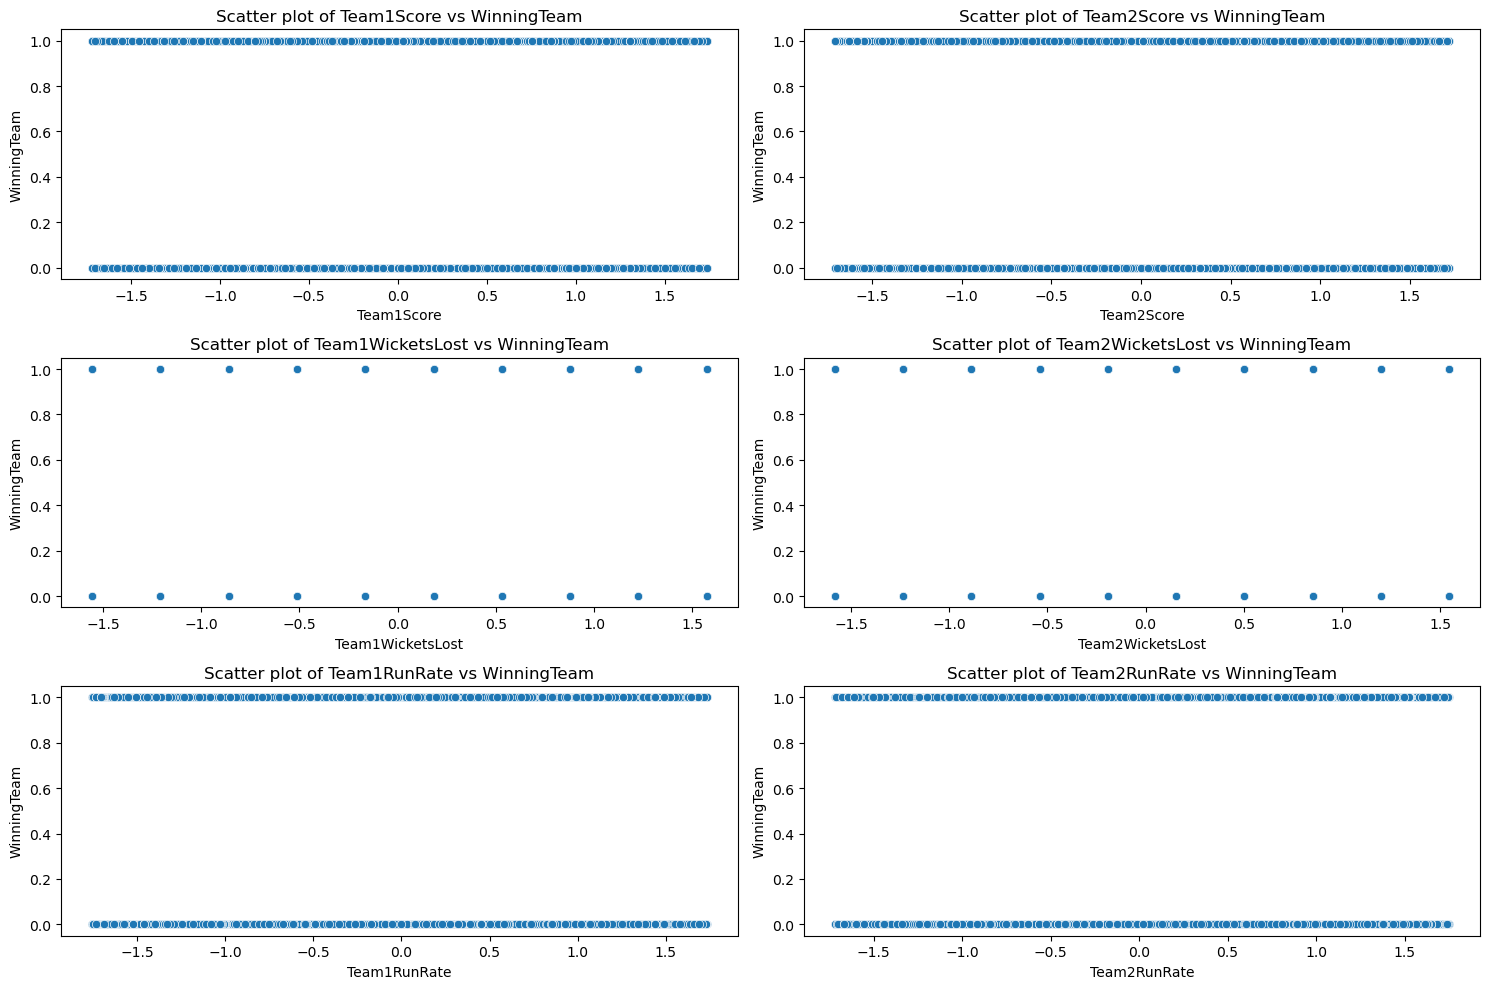

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create scatter plots for continuous variables against the target variable
continuous_features = ['Team1Score', 'Team2Score', 'Team1WicketsLost', 
                       'Team2WicketsLost', 'Team1RunRate', 'Team2RunRate']

# Plotting
plt.figure(figsize=(15, 10))
for i, feature in enumerate(continuous_features):
    plt.subplot(3, 2, i + 1)
    sns.scatterplot(x=data_encoded[feature], y=data_encoded['WinningTeam'])
    plt.title(f'Scatter plot of {feature} vs WinningTeam')

plt.tight_layout()
plt.show()


**THE OUTCOME OF THE PLOT IS LINEAR SO CHOOSE LINEAR REGRESSION MODEL**

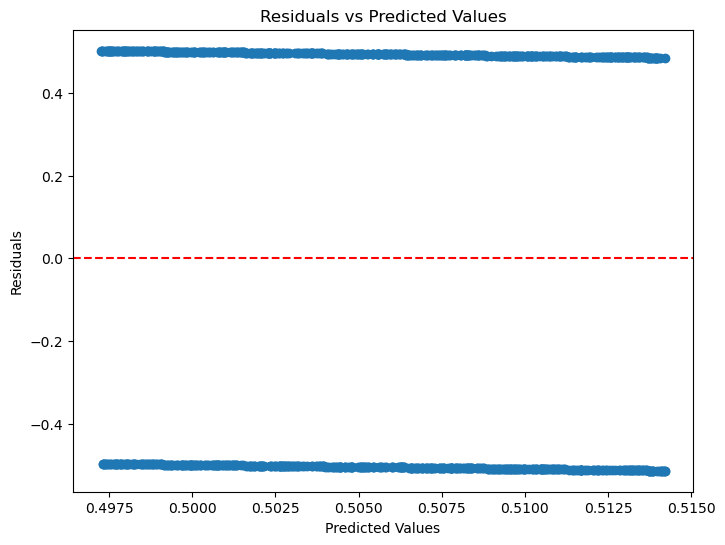

In [58]:
from sklearn.linear_model import LinearRegression

# Fit a linear model
linear_model = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.2, random_state=42)
linear_model.fit(X_train, y_train)

# Make predictions and calculate residuals
y_pred = linear_model.predict(X_test)
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


**LINEAR REGRESSION MODEL TRAINING**

In [76]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R-squared (R2):", r2_score(y_true, y_pred))
    print("-" * 50)

# Linear Regression model training and evaluation
from sklearn.linear_model import LinearRegression

lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

y_pred_lr = lr_model.predict(X_test)

evaluate_model(y_test, y_pred_lr, "Linear Regression")


Linear Regression Evaluation:
Mean Absolute Error (MAE): 0.49979843932180745
Mean Squared Error (MSE): 0.2498549673780958
R-squared (R2): -0.0010215039186529662
--------------------------------------------------


**RANDOM FOREST CLASSIFIER MODEL TRAINING**

In [84]:
from sklearn.ensemble import RandomForestClassifier

def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R-squared (R2):", r2_score(y_true, y_pred))
    print("-" * 50)

# Create and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_pred_prob_rf = rf_model.predict_proba(X_test)[:, 1] 

evaluate_model(y_test, y_pred_rf, "Random Forest")


Random Forest Evaluation:
Mean Absolute Error (MAE): 0.474
Mean Squared Error (MSE): 0.474
R-squared (R2): -0.8990384615384617
--------------------------------------------------


**GRADIENT BOOSTING MODEL TRAINING**

In [86]:
from sklearn.ensemble import GradientBoostingClassifier


def evaluate_model(y_true, y_pred, model_name):
    print(f"{model_name} Evaluation:")
    print("Mean Absolute Error (MAE):", mean_absolute_error(y_true, y_pred))
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R-squared (R2):", r2_score(y_true, y_pred))
    print("-" * 50)

# Create and train the Gradient Boosting model
gb_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
gb_model.fit(X_train, y_train)


y_pred_gb = gb_model.predict(X_test)
y_pred_prob_gb = gb_model.predict_proba(X_test)[:, 1] 

evaluate_model(y_test, y_pred_gb, "Gradient Boosting")


Gradient Boosting Evaluation:
Mean Absolute Error (MAE): 0.511
Mean Squared Error (MSE): 0.511
R-squared (R2): -1.047275641025641
--------------------------------------------------


**TUNING AND EVALUATION OF MODEL USING PERFORMANCE METRICS SUCH AS ACCURACY,PRECISION ETCC.,**

Model Accuracy: 50.90%
Precision: 51.78%
Recall: 81.15%
F1-Score: 63.22%


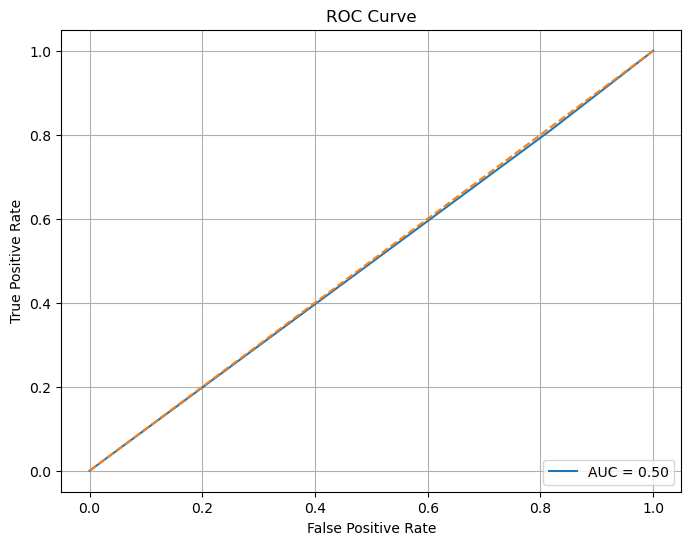

In [88]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import numpy as np
import matplotlib.pyplot as plt

# Define the Linear Regression model
linear_model = LinearRegression()


linear_model.fit(X_train, y_train)


y_pred = linear_model.predict(X_test)
y_pred_binary = [1 if y >= 0.5 else 0 for y in y_pred]

accuracy = accuracy_score(y_test, y_pred_binary)
precision = precision_score(y_test, y_pred_binary)
recall = recall_score(y_test, y_pred_binary)
f1 = f1_score(y_test, y_pred_binary)
auc_roc = roc_auc_score(y_test, y_pred_binary)

print(f"Model Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

fpr, tpr, thresholds = roc_curve(y_test, y_pred_binary)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')  
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Hyperparameters: {'bootstrap': False, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Random Forest Model Accuracy: 49.10%
Precision: 49.06%
Recall: 49.10%
F1-Score: 49.08%

Classification Report:
               precision    recall  f1-score   support

           0       0.47      0.46      0.46       480
           1       0.51      0.52      0.51       520

    accuracy                           0.49      1000
   macro avg       0.49      0.49      0.49      1000
weighted avg       0.49      0.49      0.49      1000


Confusion Matrix:
 [[221 259]
 [250 270]]


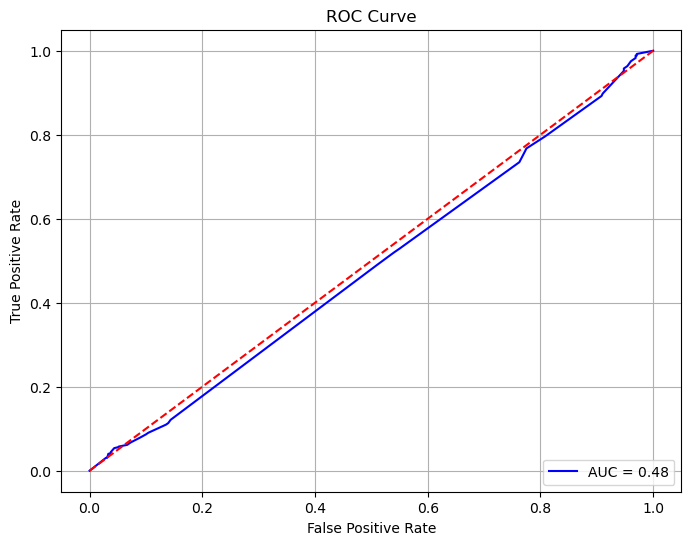

In [90]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Step 1: Define the Random Forest model
rf_model = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [100, 200, 300],  
    'max_depth': [10, 20, 30, None],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4],    
    'bootstrap': [True, False]        
}


grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=3, 
                           scoring='accuracy', n_jobs=-1, verbose=2)


grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")

best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)
y_pred_prob_rf = best_rf_model.predict_proba(X_test)[:, 1]  

# Evaluate the optimized model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf, average='weighted')
recall = recall_score(y_test, y_pred_rf, average='weighted')
f1 = f1_score(y_test, y_pred_rf, average='weighted')

print(f"Random Forest Model Accuracy: {rf_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")

print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)
auc_roc = roc_auc_score(y_test, y_pred_prob_rf)

#Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


Fitting 3 folds for each of 243 candidates, totalling 729 fits
Best Hyperparameters: {'learning_rate': 0.01, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 100}
Gradient Boosting Model Accuracy: 49.20%
Precision: 48.40%
Recall: 49.20%
F1-Score: 47.62%

Classification Report:
               precision    recall  f1-score   support

           0       0.46      0.31      0.37       480
           1       0.51      0.66      0.57       520

    accuracy                           0.49      1000
   macro avg       0.48      0.49      0.47      1000
weighted avg       0.48      0.49      0.48      1000


Confusion Matrix:
 [[149 331]
 [177 343]]


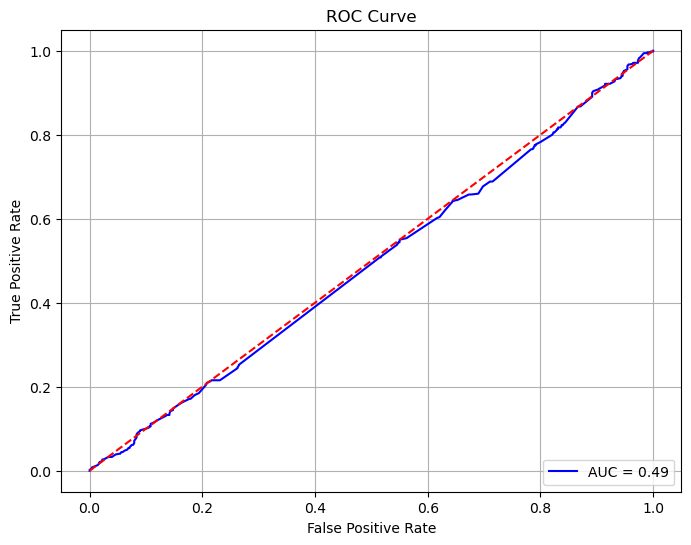

In [94]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt


gb_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [100, 200, 300],        
    'learning_rate': [0.01, 0.1, 0.2],      
    'max_depth': [3, 5, 7],                  
    'min_samples_split': [2, 5, 10],         
    'min_samples_leaf': [1, 2, 4],          
}

grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=3, 
                           scoring='accuracy', n_jobs=-1, verbose=2)

grid_search.fit(X_train, y_train)


best_params = grid_search.best_params_
print(f"Best Hyperparameters: {best_params}")


best_gb_model = grid_search.best_estimator_
y_pred_gb = best_gb_model.predict(X_test)
y_pred_prob_gb = best_gb_model.predict_proba(X_test)[:, 1]  

gb_accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb, average='weighted')
recall = recall_score(y_test, y_pred_gb, average='weighted')
f1 = f1_score(y_test, y_pred_gb, average='weighted')

print(f"Gradient Boosting Model Accuracy: {gb_accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")
print(f"F1-Score: {f1 * 100:.2f}%")


print("\nClassification Report:\n", classification_report(y_test, y_pred_gb))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_gb)
auc_roc = roc_auc_score(y_test, y_pred_prob_gb)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_roc:.2f}', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='red')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.grid()
plt.show()


**COMPARISION AND CHOOSE THE BEST MODEL**
BEST MODEL IS **LINEAR REGRESSION MODEL**(IT GIVES THE MORE ACCURACY **(50.09%)** OTHER THAN 2 MODELS)

           Linear Regression  Random Forest  Gradient Boosting
Accuracy            0.509000       0.491000           0.492000
Precision           0.484016       0.484016           0.484016
Recall              0.492000       0.492000           0.492000
F1-Score            0.476229       0.476229           0.476229
AUC-ROC             0.491148       0.491148           0.491148


<Figure size 1200x800 with 0 Axes>

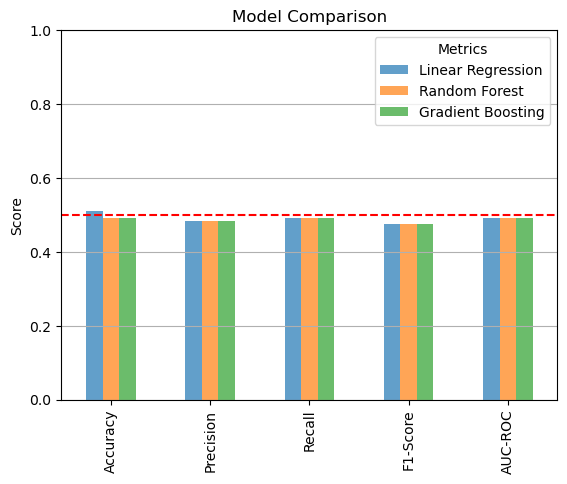

In [96]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming these variables hold the metrics for each model:
# From the Linear Regression part
accuracy_linear = accuracy
precision_linear = precision
recall_linear = recall
f1_linear = f1
auc_roc_linear = auc_roc

# From the Random Forest part
rf_accuracy = rf_accuracy
precision_rf = precision
recall_rf = recall
f1_rf = f1
auc_roc_rf = auc_roc

# From the Gradient Boosting part
gb_accuracy = gb_accuracy
precision_gb = precision
recall_gb = recall
f1_gb = f1
auc_roc_gb = auc_roc

metrics = {
    'Linear Regression': {
        'Accuracy': accuracy_linear,
        'Precision': precision_linear,
        'Recall': recall_linear,
        'F1-Score': f1_linear,
        'AUC-ROC': auc_roc_linear
    },
    'Random Forest': {
        'Accuracy': rf_accuracy,
        'Precision': precision_rf,
        'Recall': recall_rf,
        'F1-Score': f1_rf,
        'AUC-ROC': auc_roc_rf
    },
    'Gradient Boosting': {
        'Accuracy': gb_accuracy,
        'Precision': precision_gb,
        'Recall': recall_gb,
        'F1-Score': f1_gb,
        'AUC-ROC': auc_roc_gb
    }
}

# Create DataFrame for Metrics
metrics_df = pd.DataFrame(metrics)

# Display the Metrics DataFrame
print(metrics_df)

# Plotting the Metrics for Comparison
plt.figure(figsize=(12, 8))
metrics_df.plot(kind='bar', alpha=0.7)
plt.title('Model Comparison')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.axhline(0.5, color='red', linestyle='--')
plt.legend(title='Metrics', loc='best')
plt.grid(axis='y')
plt.show()



**PREDICT THE WINNING TEAM USING LINEAR REGRESSION MODEL(CHOOSEN MODEL)**

In [98]:
import pandas as pd

predictions_df = pd.DataFrame({
    'Actual Outcome': y_test,       
    'Predicted Outcome': y_pred_binary 
})


def predict_winning_team(predicted_outcome):
    if predicted_outcome == 1:
        return 'Team1'  
    else:
        return 'Team2'  

predictions_df['Winning Team'] = predictions_df['Predicted Outcome'].apply(predict_winning_team)

print(predictions_df[['Actual Outcome', 'Predicted Outcome', 'Winning Team']].head())

predictions_df.to_csv('predicted_winning_team.csv', index=False)


      Actual Outcome  Predicted Outcome Winning Team
1501               1                  1        Team1
2586               0                  1        Team1
2653               0                  1        Team1
1055               1                  1        Team1
705                1                  0        Team2


**VISUALIZE THE PREDICTION USING BAR GRAPH**

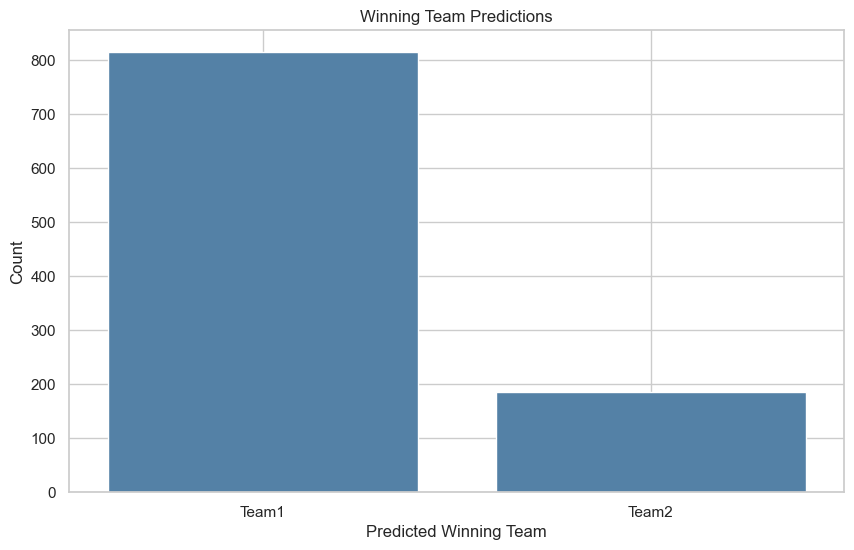

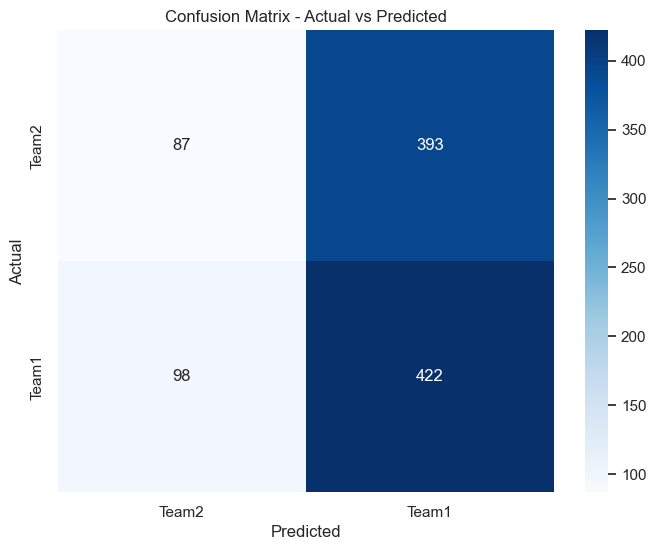

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

# Create a bar chart to visualize actual vs predicted outcomes
plt.figure(figsize=(10, 6))

sns.countplot(x='Winning Team', data=predictions_df, order=['Team1', 'Team2'], color='steelblue')

plt.title('Winning Team Predictions')
plt.xlabel('Predicted Winning Team')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(True)

plt.show()

# Create a confusion matrix to visualize
from sklearn.metrics import confusion_matrix

# Generate confusion matrix
conf_matrix = confusion_matrix(predictions_df['Actual Outcome'], predictions_df['Predicted Outcome'])

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Team2', 'Team1'], yticklabels=['Team2', 'Team1'])

plt.title('Confusion Matrix - Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

plt.show()
